In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df_Texas_Covid_case = pd.read_excel("../fixed Texas COVID-19 Active Case Data by County.xlsx",header=2)

In [3]:
a = df_Texas_Covid_case.set_index('County')

In [4]:
a.index

Index(['Anderson', 'Andrews', 'Angelina', 'Aransas', 'Archer', 'Armstrong',
       'Atascosa', 'Austin', 'Bailey', 'Bandera',
       ...
       'Willacy', 'Williamson', 'Wilson', 'Winkler', 'Wise', 'Wood', 'Yoakum',
       'Young', 'Zapata', 'Zavala'],
      dtype='object', name='County', length=254)

In [5]:
b = a.sum(axis=0)

In [6]:
b

Active\r\nCases\r\n4-7      7536
Active\r\nCases\r\n4-8      8397
Active\r\nCases\r\n4-9      8919
Active\r\nCases\r\n4-10    10067
Active\r\nCases\r\n4-11    10682
                           ...  
Active\r\nCases\r\n6-3     30654
Active\r\nCases\r\n6-4     30041
Active\nCases\n6-5         30540
Active\nCases\n6-6         31557
Active\nCases\n6-8         32321
Length: 62, dtype: int64

In [7]:
?b.rename

In [8]:
b.rename(index={'Active Cases 06-08':'Active\r\nCases\r\n6-8'},inplace=True)

In [9]:
b.index[61]

'Active\nCases\n6-8'

In [10]:
month_temp = int(b.index[0].split('\n')[2].split('-')[0])

In [11]:
month_temp

4

In [12]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count].split('\n')[2].split('-')[0])
    day_temp = int(b.index[count].split('\n')[2].split('-')[1])
 #   print(month_temp, day_temp)
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
6 1
6 2
6 3
6 4
6 5
6 6
6 8


In [13]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Active Cases'])

In [14]:
c = dated_df.set_index('Date')

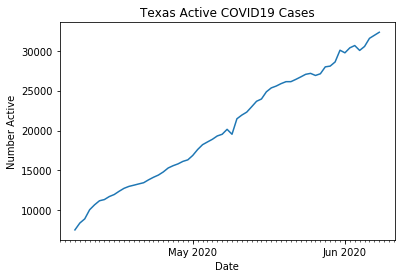

In [15]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Active',color='black')
plt.plot(c)
plt.title('Texas Active COVID19 Cases')
plt.savefig('TexasActive.png')

In [16]:
c

,Active Cases
Date,
2020-04-07,7536
2020-04-08,8397
2020-04-09,8919
2020-04-10,10067
2020-04-11,10682
...,...
2020-06-03,30654
2020-06-04,30041
2020-06-05,30540
